In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator,load_img


In [43]:
train_dir = "src/Data/train/"
test_dir = "src/Data/test/"

In [44]:
img_size = 48 #original size of the image

In [45]:
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print()
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171

      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


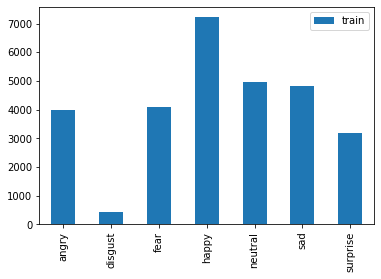

In [46]:
train_count.transpose().plot(kind='bar')

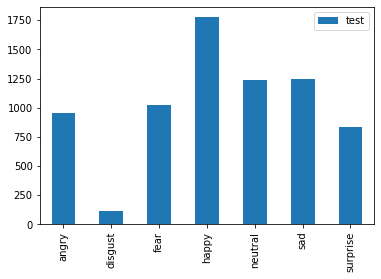

In [47]:
test_count.transpose().plot(kind='bar')

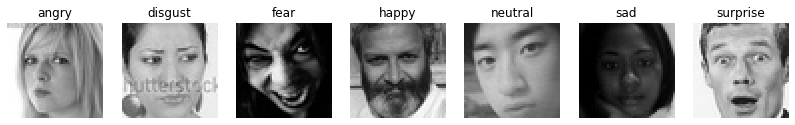

In [49]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[10]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [50]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )


validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [51]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_gen = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
val_gen = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [63]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 24, 24, 128)      

In [68]:
model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [69]:
history = model.fit(x = train_gen,epochs = 60,validation_data = val_gen)

Epoch 1/60
359/359 [==============================] - 844s 2s/step - loss: 2.3895 - accuracy: 0.1934 - val_loss: 2.1389 - val_accuracy: 0.2479
Epoch 2/60
359/359 [==============================] - 638s 2s/step - loss: 2.1046 - accuracy: 0.2366 - val_loss: 1.8981 - val_accuracy: 0.2493
Epoch 3/60
359/359 [==============================] - 782s 2s/step - loss: 1.9900 - accuracy: 0.2664 - val_loss: 1.7999 - val_accuracy: 0.3087
Epoch 4/60
359/359 [==============================] - 720s 2s/step - loss: 1.8995 - accuracy: 0.2935 - val_loss: 1.7060 - val_accuracy: 0.3366
Epoch 5/60
359/359 [==============================] - 717s 2s/step - loss: 1.8231 - accuracy: 0.3180 - val_loss: 1.5854 - val_accuracy: 0.3820
Epoch 6/60
359/359 [==============================] - 717s 2s/step - loss: 1.7300 - accuracy: 0.3549 - val_loss: 1.5795 - val_accuracy: 0.4001
Epoch 7/60
359/359 [==============================] - 748s 2s/step - loss: 1.6731 - accuracy: 0.3734 - val_loss: 1.5561 - val_accuracy: 0.3827

Epoch 58/60
359/359 [==============================] - 671s 2s/step - loss: 0.8107 - accuracy: 0.6956 - val_loss: 0.9054 - val_accuracy: 0.6809
Epoch 59/60
359/359 [==============================] - 664s 2s/step - loss: 0.8039 - accuracy: 0.7015 - val_loss: 0.9341 - val_accuracy: 0.6718
Epoch 60/60
359/359 [==============================] - 675s 2s/step - loss: 0.7966 - accuracy: 0.6985 - val_loss: 0.8976 - val_accuracy: 0.6802


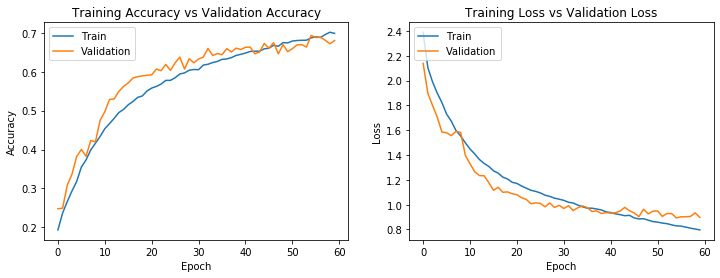

In [73]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [71]:
model.save('model_optimal.h5')